In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)
        
    method_map = {
        'one_cut_one_quant': '1_dtable',
        'one_cut_many_quants': 'many_dtable',
        'many_cuts_one_quant_1': '1_maxsat',
        'many_cuts_one_quant_2': '1_1_maxsat',
    }
    data['method'] = data['method'].astype(str).map(method_map)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    data = data.sort(['file', 'method'])
    
    # Adding a column for the database
    def getDB (s):
        if s.endswith(')'):
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

,method,file,status
47319,1_maxsat,FactorialFunctionEqualityExampleProof2(32),cutintro_other_exception
8919,1_maxsat,FactorialFunctionEqualityExampleProof2(33),cutintro_other_exception
7592,1_maxsat,FactorialFunctionEqualityExampleProof2(34),cutintro_other_exception
33478,1_1_maxsat,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
37863,1_dtable,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
13259,1_maxsat,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
19190,2_2_maxsat,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
54186,2_maxsat,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
10875,many_dtable,FactorialFunctionEqualityExampleProof2(35),cutintro_other_exception
771,1_1_maxsat,FactorialFunctionEqualityExampleProof2(36),cutintro_other_exception


In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

,file,status_dtable
7,FactorialFunctionEqualityExampleProof(14),cutintro_timeout
92,FactorialFunctionEqualityExampleProof2(17),cutintro_timeout
93,FactorialFunctionEqualityExampleProof2(18),cutintro_timeout
94,FactorialFunctionEqualityExampleProof2(19),cutintro_timeout
96,FactorialFunctionEqualityExampleProof2(20),cutintro_timeout
97,FactorialFunctionEqualityExampleProof2(21),cutintro_timeout
98,FactorialFunctionEqualityExampleProof2(22),cutintro_timeout
99,FactorialFunctionEqualityExampleProof2(23),cutintro_timeout
100,FactorialFunctionEqualityExampleProof2(24),cutintro_timeout
101,FactorialFunctionEqualityExampleProof2(25),cutintro_timeout


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

,file,status_maxsat
117,FactorialFunctionEqualityExampleProof2(4),cutintro_uncompressible
196,LinearEqExampleProof(2),cutintro_uncompressible
398,SquareDiagonalExampleProof(2),cutintro_uncompressible
600,SquareEdgesExampleProof(2),cutintro_uncompressible
824,SumOfOnesExampleProof(4),cutintro_other_exception
4259,testing/TSTP/prover9/ALG/ALG012-1/Prover9---11...,cutintro_timeout
4339,testing/TSTP/prover9/ALG/ALG203+1/Prover9---11...,cutintro_uncompressible
4434,testing/TSTP/prover9/ANA/ANA022-2/Prover9---11...,cutintro_timeout
4458,testing/TSTP/prover9/BOO/BOO001-1/Prover9---11...,cutintro_uncompressible
4469,testing/TSTP/prover9/BOO/BOO007-1/Prover9---11...,cutintro_timeout


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'], suffixes=('_new','_old'))

regression = merged[(merged.status_old == 'ok') & (merged.status_new != 'ok')]

regression_delta = regression[(regression.method == '1_dtable') | (regression.method == 'many_dtable')]
regression_maxsat = regression[((regression.method == '1_maxsat') | (regression.method == '1_1_maxsat')) ]

regression[['method', 'file', 'status_old', 'status_new']]

,method,file,status_old,status_new
13,1_maxsat,LinearEqExampleProof(2),ok,cutintro_uncompressible
26,1_1_maxsat,LinearEqExampleProof(7),ok,cutintro_ehs_unprovable
47,1_1_maxsat,LinearExampleProof(13),ok,cutintro_ehs_unprovable
131,1_maxsat,SquareEdgesExampleProof(2),ok,cutintro_uncompressible
243,1_dtable,testing/TSTP/prover9/ALG/ALG071+1/Prover9---11...,ok,cutintro_uncompressible
248,1_1_maxsat,testing/TSTP/prover9/ALG/ALG074+1/Prover9---11...,ok,cutintro_ehs_unprovable
361,1_maxsat,testing/TSTP/prover9/BOO/BOO001-1/Prover9---11...,ok,cutintro_uncompressible
387,1_dtable,testing/TSTP/prover9/BOO/BOO005-1/Prover9---11...,ok,cutintro_uncompressible
389,1_1_maxsat,testing/TSTP/prover9/BOO/BOO006-1/Prover9---11...,ok,cutintro_uncompressible
390,1_dtable,testing/TSTP/prover9/BOO/BOO006-1/Prover9---11...,ok,cutintro_uncompressible


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1193
Proof examples - 1_dtable: 1194
Proof examples - 1_maxsat: 1193
Proof examples - 2_2_maxsat: 1197
Proof examples - 2_maxsat: 1195
Proof examples - many_dtable: 1195

Prover9 - 1_1_maxsat: 6337
Prover9 - 1_dtable: 6338
Prover9 - 1_maxsat: 6339
Prover9 - 2_2_maxsat: 6340
Prover9 - 2_maxsat: 6338
Prover9 - many_dtable: 6337

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 140
VeriT - many_dtable: 142

LeanCoP - 1_1_maxsat: 3042
LeanCoP - 1_dtable: 3043
LeanCoP - 1_maxsat: 3041
LeanCoP - 2_2_maxsat: 3043
LeanCoP - 2_maxsat: 3042
LeanCoP - many_dtable: 3040



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

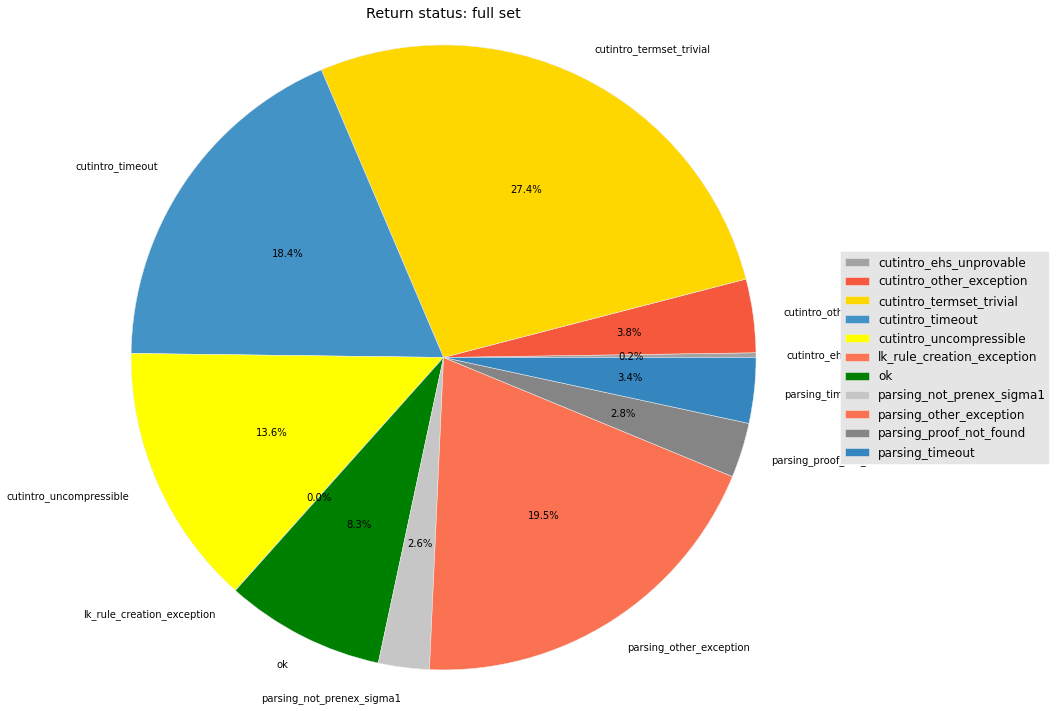

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

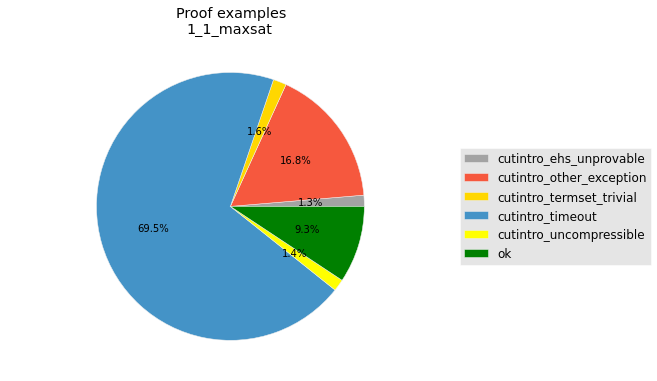

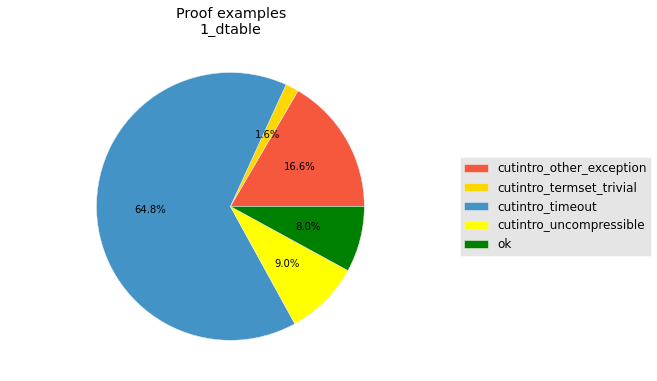

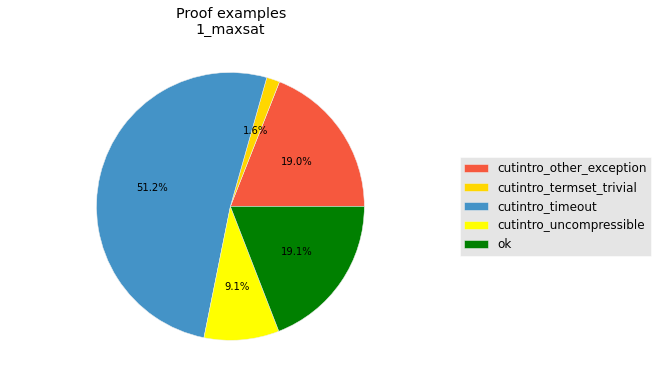

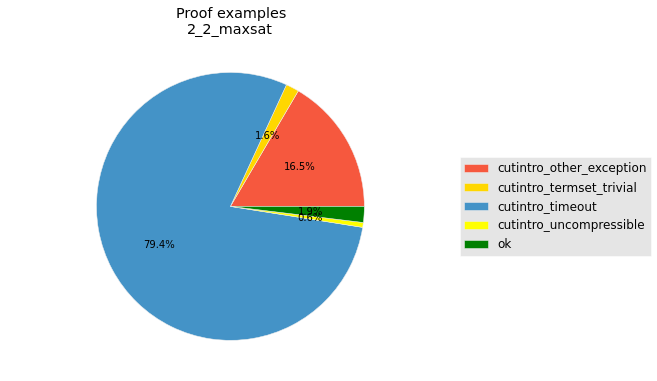

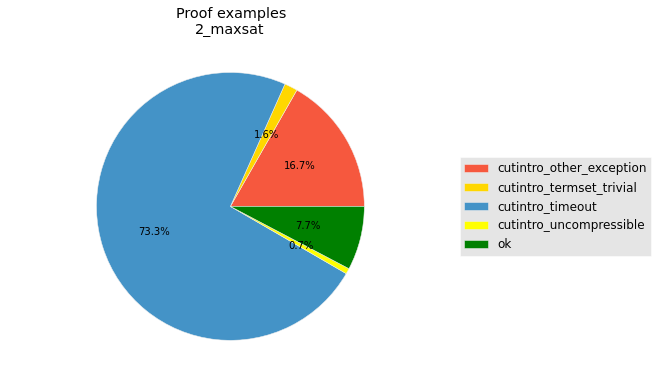

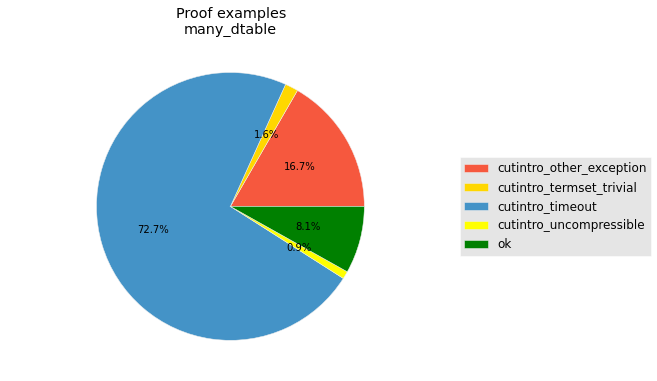

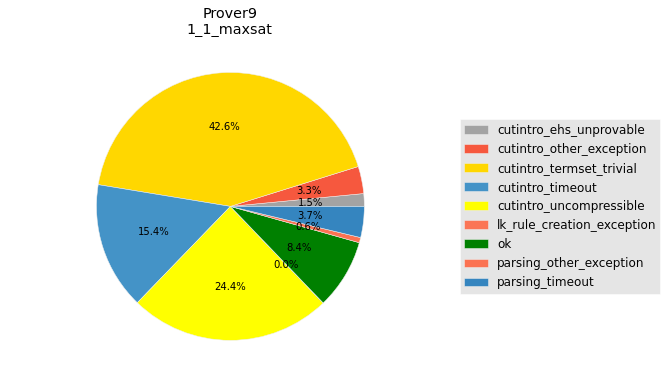

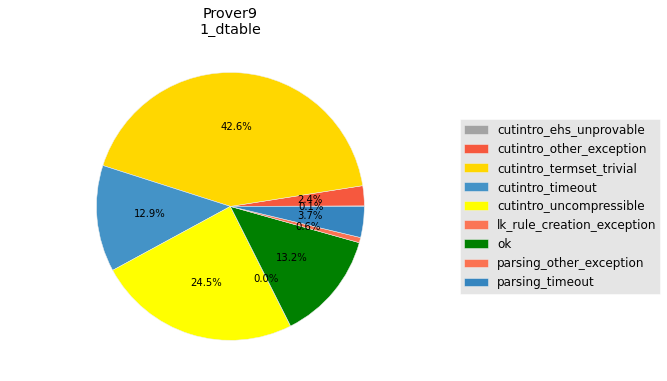

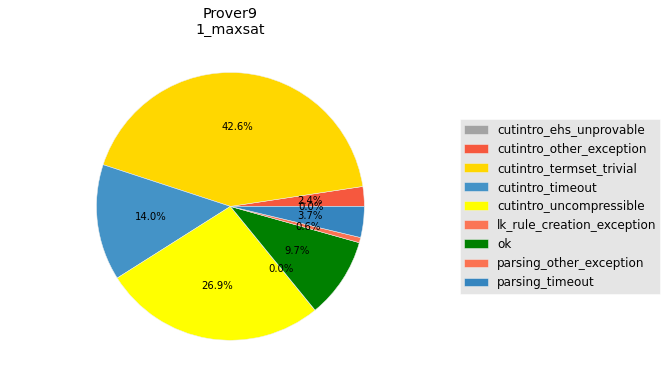

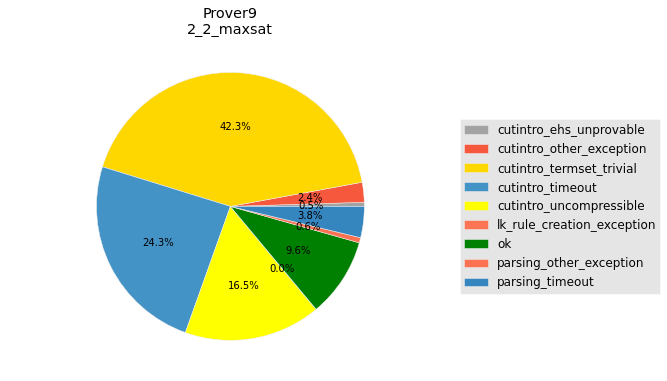

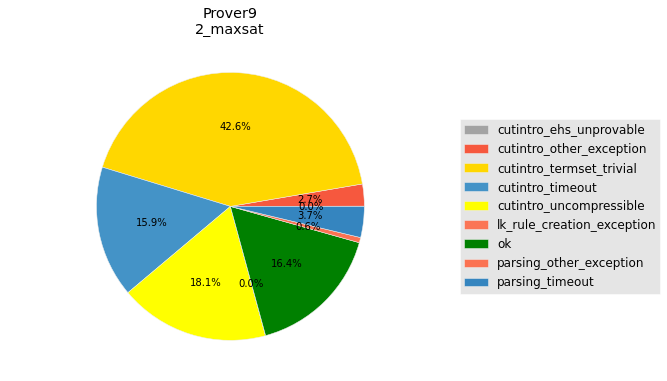

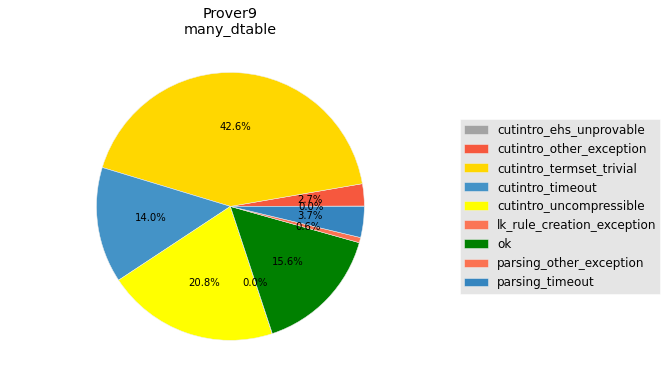

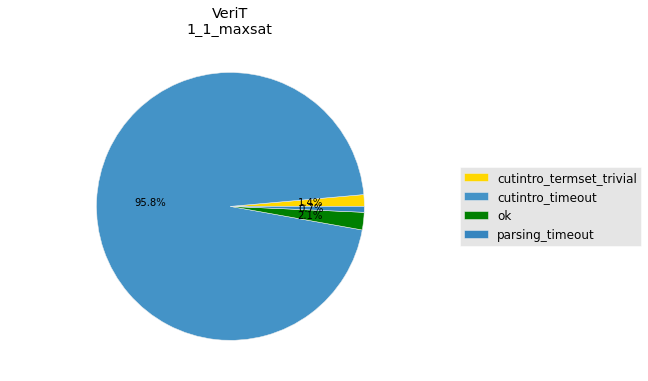

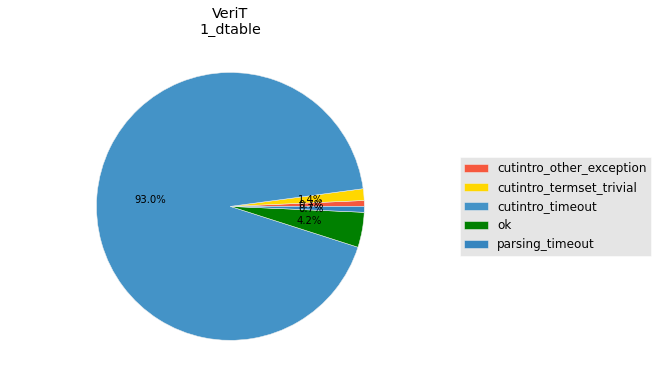

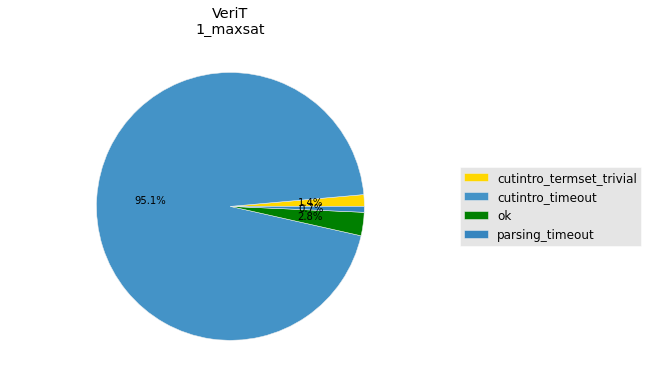

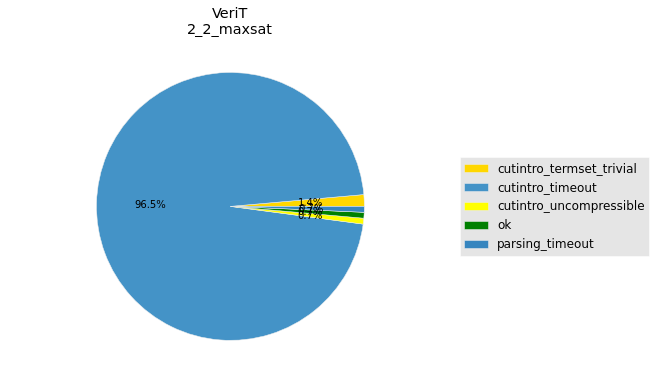

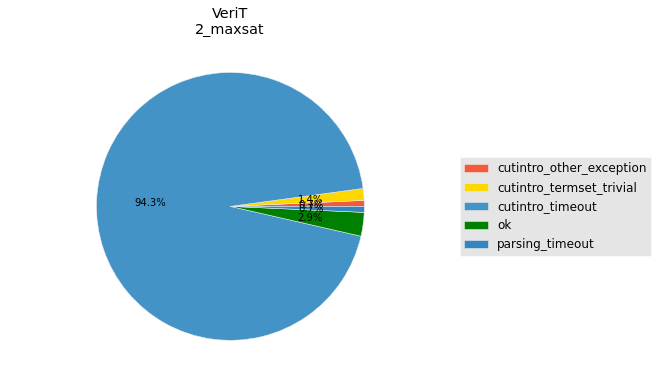

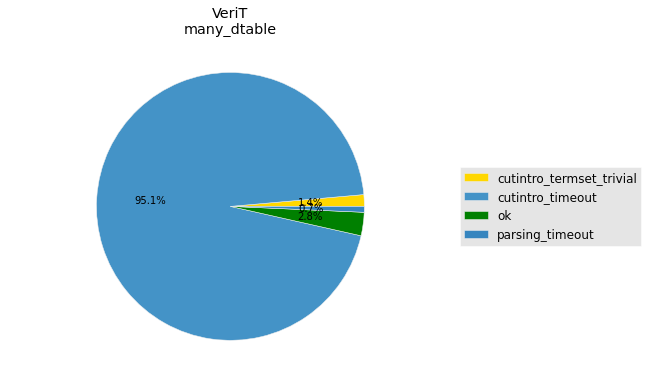

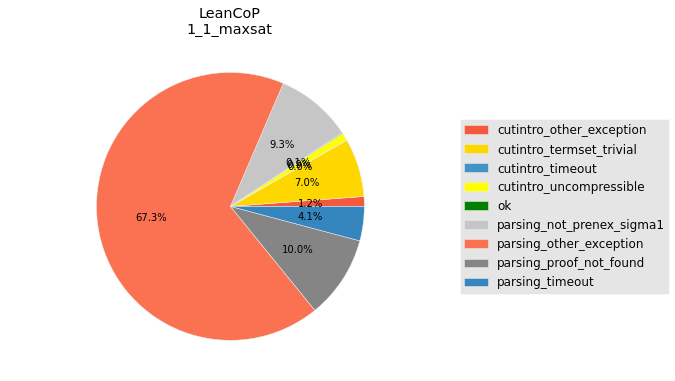

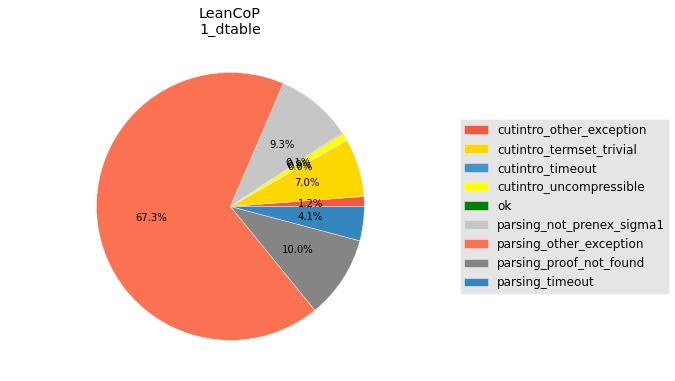

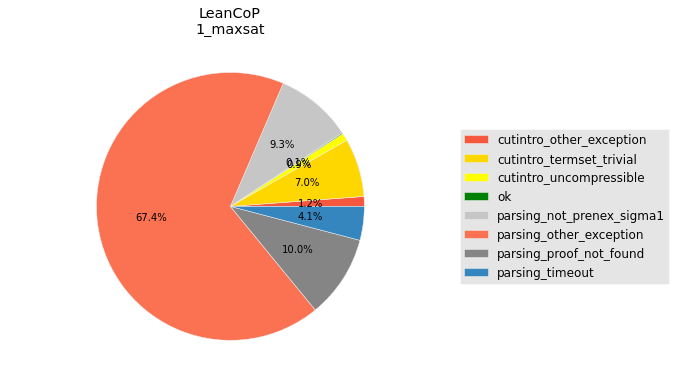

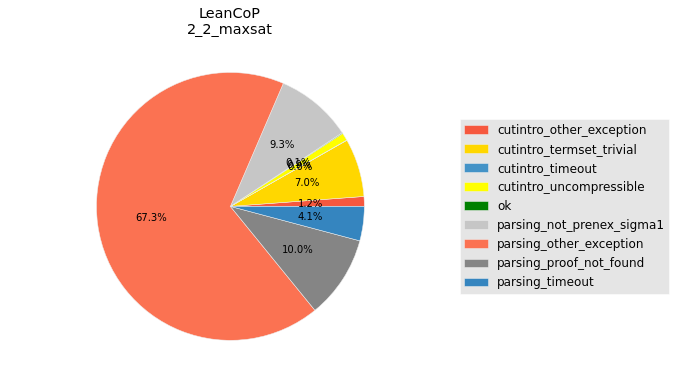

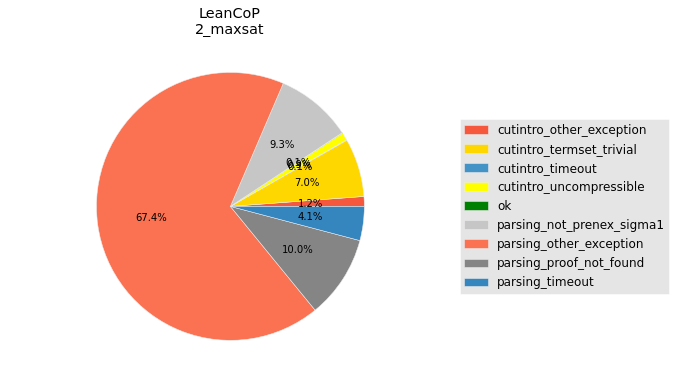

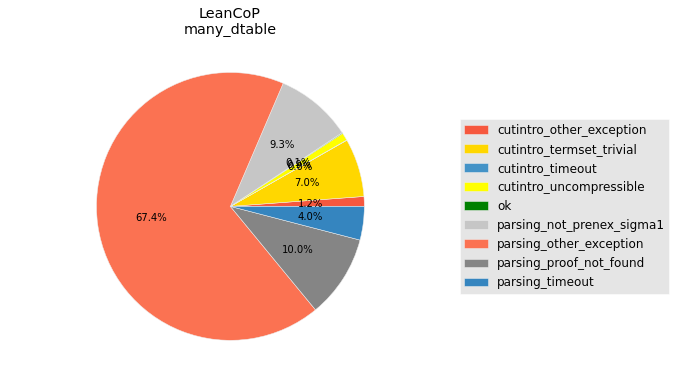

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

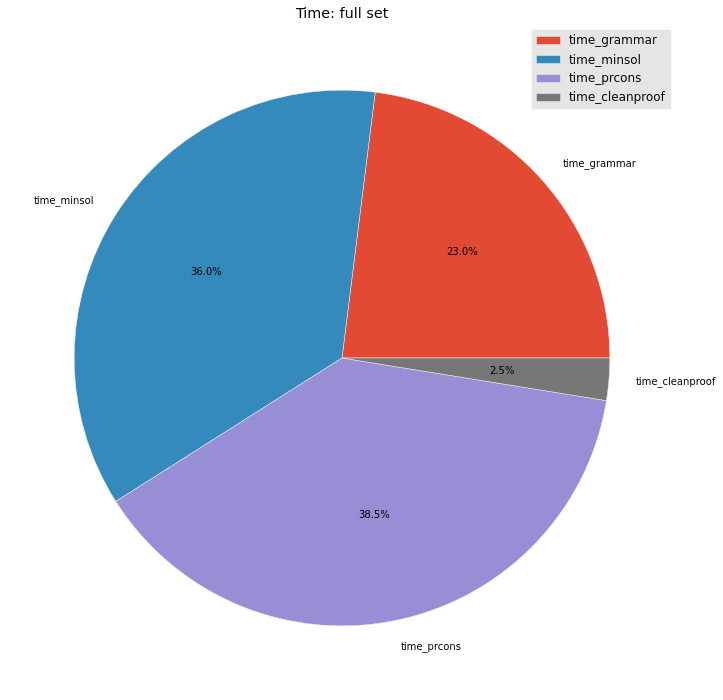

In [13]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

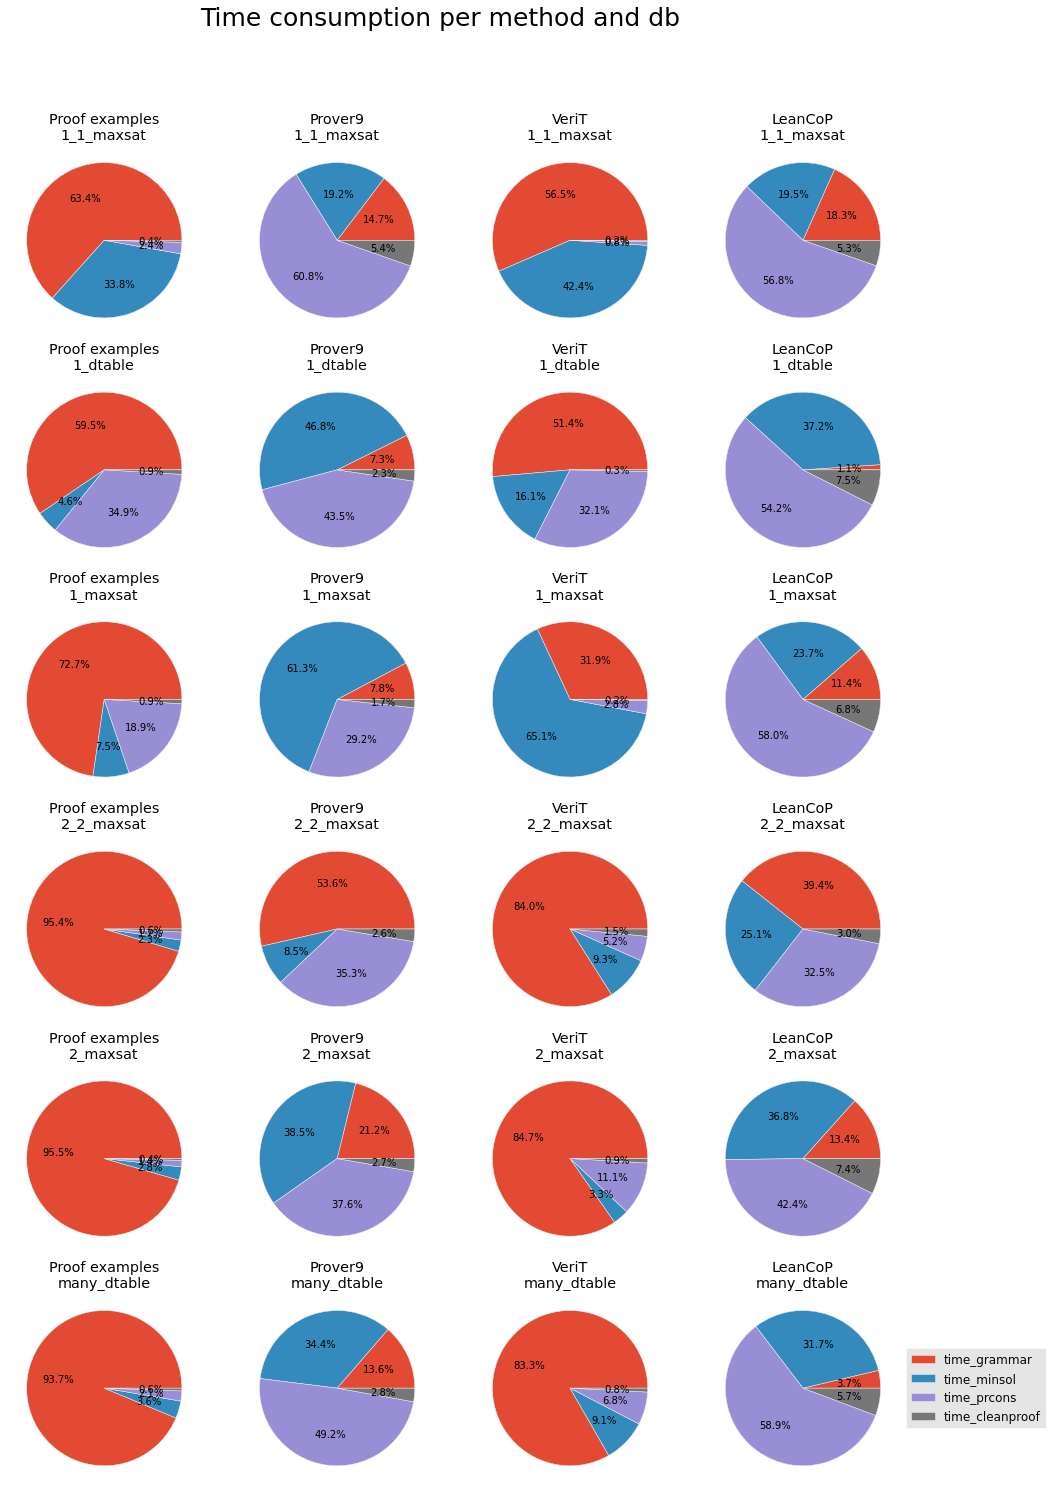

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

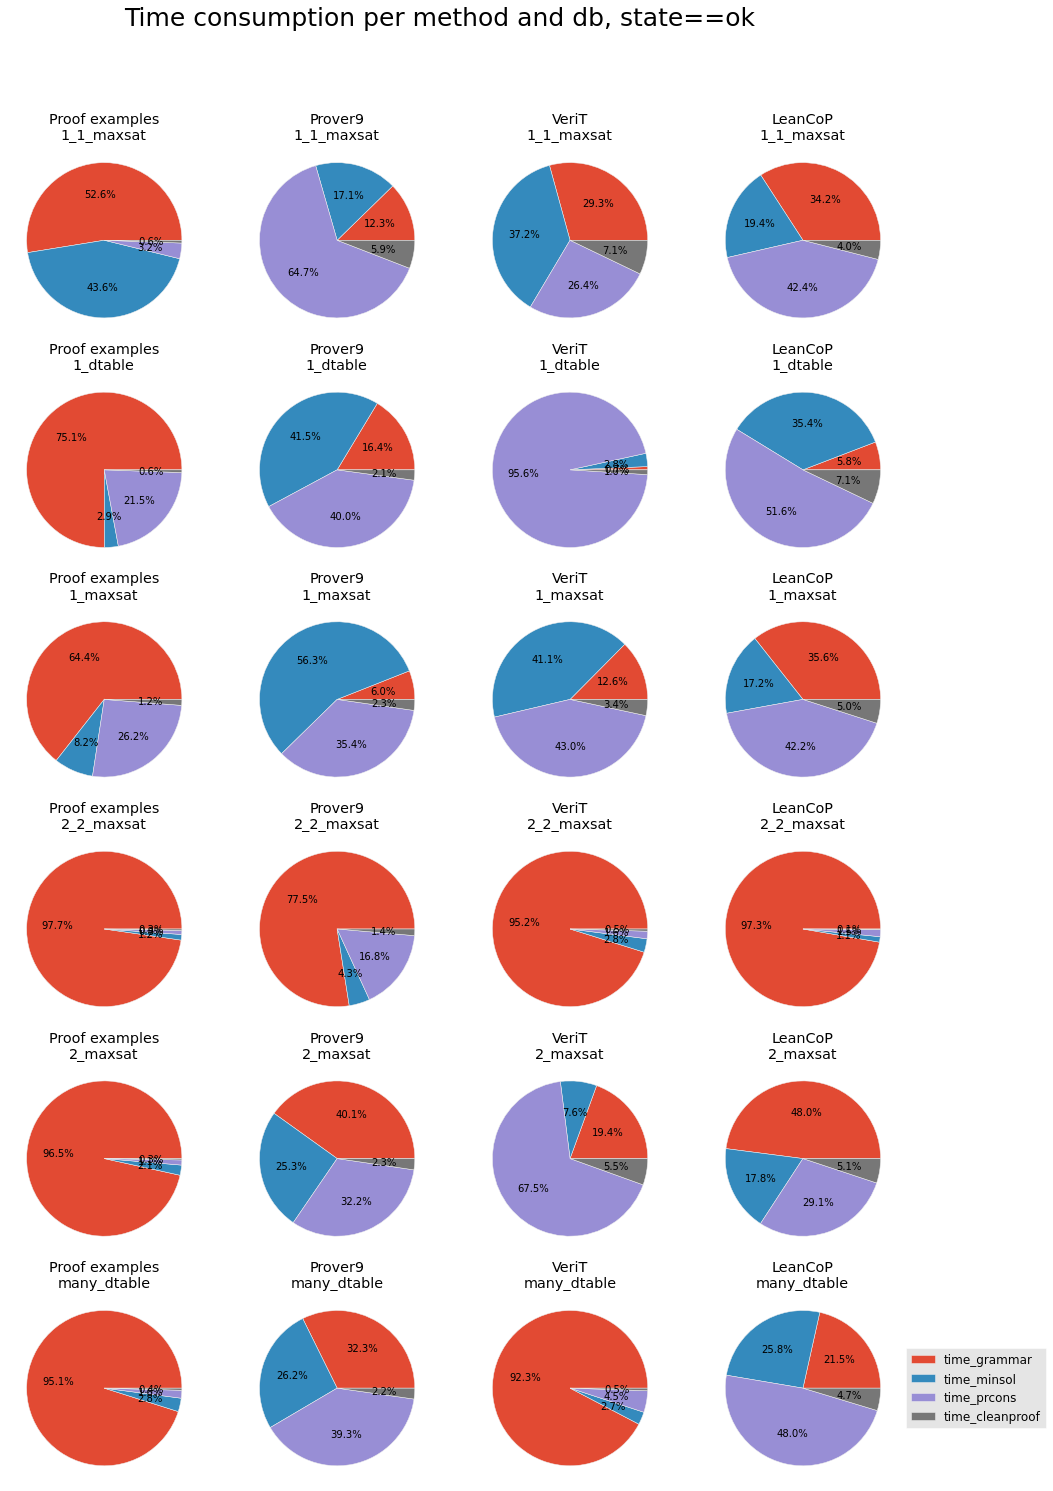

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
data['status'].value_counts()

cutintro_termset_trivial      17589
parsing_other_exception       12533
cutintro_timeout              11834
cutintro_uncompressible        8739
ok                             5306
cutintro_other_exception       2441
parsing_timeout                2179
parsing_proof_not_found        1824
parsing_not_prenex_sigma1      1692
cutintro_ehs_unprovable         154
lk_rule_creation_exception        6
dtype: int64

In [17]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
56,SquareEdges2DimExampleProof(10),19,16
57,SquareEdges2DimExampleProof(11),20,16
58,SquareEdges2DimExampleProof(12),21,16
59,SquareEdges2DimExampleProof(13),23,18
60,SquareEdges2DimExampleProof(14),24,18
61,SquareEdges2DimExampleProof(15),25,18
64,SquareEdges2DimExampleProof(6),13,12
65,SquareEdges2DimExampleProof(7),15,14
66,SquareEdges2DimExampleProof(8),16,14
67,SquareEdges2DimExampleProof(9),17,14


In [18]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
0,FactorialFunctionEqualityExampleProof(3),31,26
1,FactorialFunctionEqualityExampleProof(4),36,27
2,FactorialFunctionEqualityExampleProof2(2),11,10
3,FactorialFunctionEqualityExampleProof2(3),13,11
4,FactorialFunctionEqualityExampleProof2(4),15,12
5,FactorialFunctionEqualityExampleProof2(5),17,13
6,FactorialFunctionEqualityExampleProof2(6),18,14
7,FactorialFunctionEqualityExampleProof2(7),20,15
8,FactorialFunctionEqualityExampleProof2(8),21,15
9,FactorialFunctionEqualityExampleProof2(9),23,16


In [19]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
34,testing/TSTP/prover9/ALG/ALG440-1/Prover9---11...,21,23,23
50,testing/TSTP/prover9/COM/COM008+1/Prover9---11...,20,23,21
61,testing/TSTP/prover9/FLD/FLD057-3/Prover9---11...,27,31,29
83,testing/TSTP/prover9/GEO/GEO180+2/Prover9---11...,14,17,15
84,testing/TSTP/prover9/GEO/GEO181+1/Prover9---11...,14,16,15
85,testing/TSTP/prover9/GEO/GEO181+2/Prover9---11...,14,18,16
100,testing/TSTP/prover9/GEO/GEO198+1/Prover9---11...,15,19,17
110,testing/TSTP/prover9/GEO/GEO205+3/Prover9---11...,21,22,22
142,testing/TSTP/prover9/GRP/GRP048-2/Prover9---11...,16,19,17
153,testing/TSTP/prover9/GRP/GRP128-1.003/Prover9-...,15,17,17


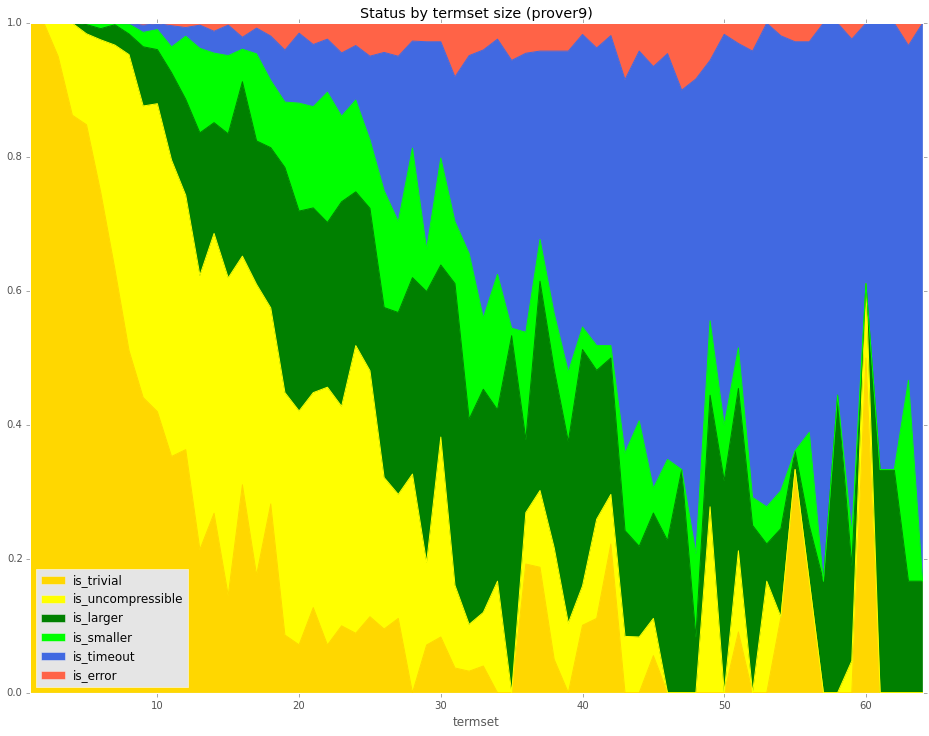

In [20]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_trivial'] = data.status.str.endswith('termset_trivial')
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_trivial & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_trivial', 'is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['gold', 'yellow', 'green', 'lime', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.1] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
57737,testing/TSTP/prover9/GRP/GRP446-1/Prover9---11...,1_1_maxsat,28,357,20
34745,testing/TSTP/prover9/GRP/GRP449-1/Prover9---11...,1_1_maxsat,32,531,20
33652,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_1_maxsat,11,149,10
51405,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_dtable,11,149,10
5743,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_maxsat,11,149,10
55512,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_2_maxsat,11,149,10
6691,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_maxsat,11,149,10
39868,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,many_dtable,11,149,10
57445,testing/TSTP/prover9/GRP/GRP482-1/Prover9---11...,1_1_maxsat,14,245,31
47383,testing/TSTP/prover9/GRP/GRP532-1/Prover9---11...,1_1_maxsat,59,1562,25


In [22]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
48213,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,many_dtable,4,5,40
59052,testing/TSTP/prover9/BOO/BOO018-4/Prover9---11...,1_1_maxsat,3,8,41
3112,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,many_dtable,11,12,59
9805,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,1_dtable,12,12,61
53460,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,many_dtable,12,12,61
56345,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_dtable,14,14,76
59567,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_maxsat,14,14,76
17552,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,many_dtable,14,14,76


In [23]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
30378,FactorialFunctionEqualityExampleProof(7),2_maxsat,299,58,NaN
10730,FactorialFunctionEqualityExampleProof2(4),1_1_maxsat,191,30,NaN
63806,FactorialFunctionEqualityExampleProof2(5),1_1_maxsat,449,49,NaN
50186,FactorialFunctionEqualityExampleProof2(6),1_1_maxsat,314,54,NaN
54391,FactorialFunctionEqualityExampleProof2(7),1_1_maxsat,712,61,NaN
57433,FactorialFunctionEqualityExampleProof2(8),1_1_maxsat,493,68,NaN
148,FactorialFunctionEqualityExampleProof2(9),1_1_maxsat,976,81,NaN
57062,SumOfOnesExampleProof(15),1_maxsat,385,45,NaN
11039,SumOfOnesExampleProof(22),1_maxsat,663,66,NaN
10523,UniformAssociativity3ExampleProof(1),2_maxsat,46,5,NaN


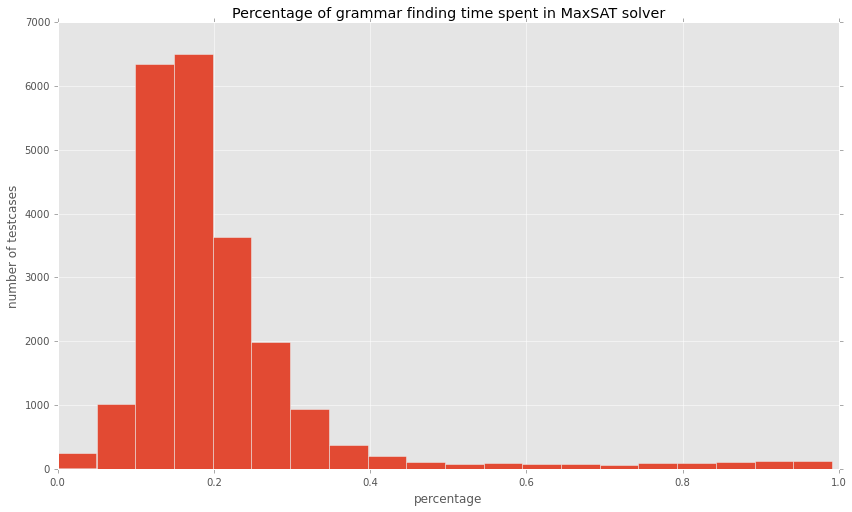

In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')